# Exercises

1. How would you define clustering? Can you name a few clustering algorithms?
2. What are some of the main applications of clustering algorithms?
3. Describe two techniques to select the right number of clusters when using K-means.
4. What is label propagation? Why would you implement it & how?
5. Can you name two clustering algorithms that can scale to large datasets? & two that look for regions of high density?
6. Can you think of a use case where active learning would be useful? How would you implement it?
7. What is the difference between anomaly detection & novelty detection?
8. What is a gaussian mixture? What tasks can you use it for?
9. Can you name two techniques to find the right number of clusters when using a gaussian mixture model?
10. The classic Olivetti faces dataset contains 400 grayscale 64x64 pixel images of faces. Each image is flattened to a 1D vector of size 4096. 40 different people were photographed (10 times each), & the usual task is to train a model that can predict which persion is represented in each picture. Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function, the split it into a training set, a validation set, & a test set (note that the dataset is already scaled between 0 & 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-means, & ensure that you have a good number of clusters (using one of the techniques discussed in this lesson). Visualise the clusters: do you see similar faces in each cluster?
11. Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, & evaluate it on the validation set. Next, use K-means as a dimensionality reduction tool & train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?
12. Train a gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset's dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the `sample()` method), & visualise them (if you used PCA, you will need to use it `inverse_transform()` method). Try to modify some images (e.g., rotate flip, darken) & see if the model can detect the anomalies (i.e., compare the output of the `score_samples()` method for normal images & for anomalies).
13. Some dimensionality reduction techniques can be used for anomaly detection. For example, take the Olivetti faces dataset & reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, & look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.

---

1. Clustering is identifying similar instances or regions of high density, & assigning them to clusters, or groups of similar instances. Some clustering algorithms include K-means, DBSCAN, agglomerative clustering, Birch, mean-shift, etc.
2. Clustering algorithms are used in a wide variety of tasks, including: *(a)* customer segmentation: you can group customers based on their purchases or activity, which is useful for targeted advertisements; *(b)* data analysis: it can be helpful to run a clustering algorithm on a new dataset & then analyse each cluster separately; *(c)* dimensionality reduction: after clustering, it's possible to replace each instance's feature vector $x$ with a vector of its cluster affinities, which is typically much lower-dimensional than the original feature vector $x$; *(d)* anomaly detection: instances with low affinity to all clusters are likely to be anomalies -- this is useful for detecting unusual behaviour, fraud, & defects in manufacturing; *(e)* semi-supervised learning: if you only have a few labels, you can use clustering & propagate the labels to all instances in the same cluster; greatly increasing the number of labels available for subsequent supervised learning & improving performance; *(f)* image segmentation: you can cluster pixels of an image accourding to their colour & replace each pixel's colour with the mean colour of its cluster; considerably reducing the number of collours in an images; this can be useful for object detection & tracking systems.
3. Inertia & silhouette score. Inertia is the mean squared distance between each instance & its closest centroid. You can then plot the inertia against different values of *k* clusters & select the value of *k* that is closest to the inflection point of the curve. The silhouette score is the mean silhouette coefficient over all instances. An instance's silhouette coefficient is equal to (b - a)/max(a, b) where a is the mean distance to the other instances in the same cluster (mean intra-cluster distance) & b is the mean distance to the instances in the next closest cluster (mean nearest-cluster distance). The silhouette coefficient is any value between -1 & 1: 1 means that the instance is well inside its own cluster, 0 means it is close to the cluster boundary, -1 means it may be assigned to the wrong cluster. We take the mean of the silhouette coefficients to get the silhouette score. We can plot this silhouette score against different values of *k* clusters & pick the value of *k* where the silhouette score is the greatest.
4. In semi-supervised learning, since only a few instances are labeled, we can propagate the labels to instances of the same cluster, thereby creating a fully labeled dataset. You would implement label propagation to hopefully increase the performance of the clustering algorithm. You can perform label propagation by taking a representative sample of instances from the training set, & manually labeling them. Then, propagate these labels to instances of the same cluster. If you compared the clustering algorithms performance trained on the labeled representative sample vs after the propagation, you should see an increase in performance, assuming the labels that were propagated were accurate. The way we propagated the labels applies to all instances in the same cluster, including the instances closer to the cluster boundaries, which are more likely to be mislabeled. If we only propagate the labels to the n% of the instances that are closest to the cluster centroids, then we would see even higher clustering performance.
5. With a connectivity matrix, agglomerative clustering or birch can effective clustering algorithms for large datasets. DBSCAN & mean-shift are two clustering algorithms that look for regions of high density.
6. Active semi-supervised learning can be great for computer vision or image recognition. Using a small amount of labeled data, we can propagate the labels to instances of the same cluster, particularly those who are closer to the cluster centroids. For the instances that are closer to the cluster borders, the algorithm can be more uncertain about which clusters the instance belongs to. The algorithm can then pose the task to the user for the instances it is uncertain of. The user would then identify which cluster the instance belongs to, & the algorithm would take that information for its training. This process will then iterate until all instances are labeled or until the algorithm's performance increase doesn't justify the effort of labeling anymore.
7. Anomaly detection is the task of detecting instances that deviate strongly from the norm, or anomalies, so it is trained on a dataset with outliers. Novelty detection assumes that it is trained on a dataset without outliers, so that when it comes time for predictions, it can identify new or unknown patterns that the algorithm was not exposed to during training.
8. A gaussian mixture is a probabilities model that assumes that the instances were generated from a mixture of several gaussian distributions whose parameters are unknown. All instances generated from a gaussian distribution form a cluster that is typically ellipsoidal in shape, but can be different shapes, sizes, densities, & orientations. Gaussian mixture models can be used for density estimation, clustering, & anomaly detection.
9. AIC & BIC. You can plot the AIC or BIC against different values of *k* clusters, & use the value of *k* where the AIC or BIC is at its minimum. Both AIC & BIC are information criterion & seek to penalise models that have more parameters to learn (e.g., more clusters) & reward models that fit the data well.

# 10.

In [2]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

olivetti_faces = fetch_olivetti_faces()
X = olivetti_faces.data
y = olivetti_faces.target

sss = StratifiedShuffleSplit(n_splits = 1, test_size = 60, random_state = 32)
for train_index, test_index in sss.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
for train_index, val_index in sss.split(X_train, y_train):
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
X_train.shape

(280, 4096)

Since there are so many features, 4096, we can perform dimensionality reduction to reduce the number of features before K-means.

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)
X_test_reduced = pca.transform(X_test)
X_train_reduced.shape

(280, 103)

4096 -> 103. Nice.

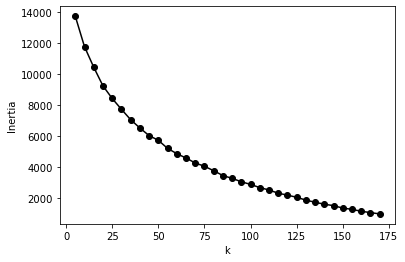

In [4]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

kmeans_per_k = []
for k in range(5, 175, 5):
    kmeans = KMeans(n_clusters = k).fit(X_train_reduced)
    kmeans_per_k.append(kmeans)
    
inertias_per_k = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(5, 175, 5), inertias_per_k, "ko-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

Inertia decreases the higher *k* is, the more clusters there are. Inertia is the mean squared distance from each instance to its closest centroid. With more clusters (more centroids), the distances will be shorter. It's also kinda hard to see where the inflection point is, maybe at k = 30 or k = 35? We'll try the silhouette score too.

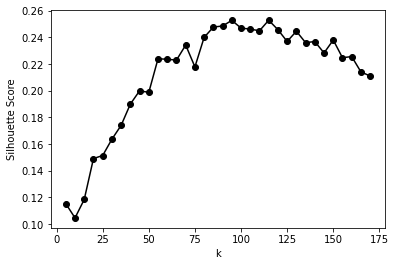

In [5]:
from sklearn.metrics import silhouette_score

silhouette_scores_per_k = [silhouette_score(X_train_reduced, model.labels_)
                           for model in kmeans_per_k]
plt.plot(range(5, 175, 5), silhouette_scores_per_k, "ko-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

In [6]:
import numpy as np

range(5, 175, 5)[np.argmax(silhouette_scores_per_k)]

115

The silhouette score is saying that the best *k* is 115.

Cluster 0


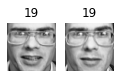

Cluster 1


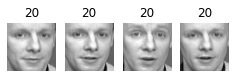

Cluster 2


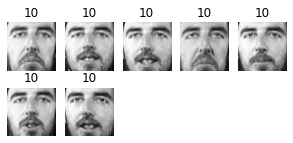

Cluster 3


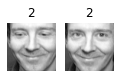

Cluster 4


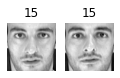

Cluster 5


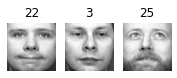

Cluster 6


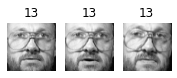

Cluster 7


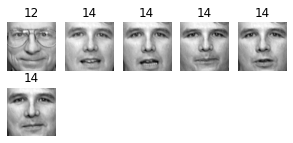

Cluster 8


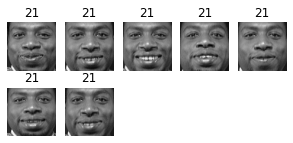

Cluster 9


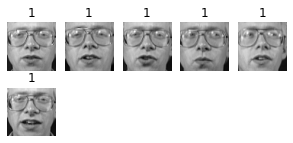

Cluster 10


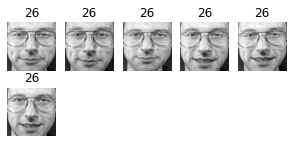

Cluster 11


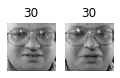

Cluster 12


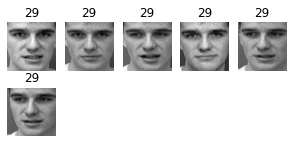

Cluster 13


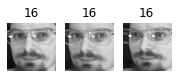

Cluster 14


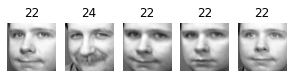

Cluster 15


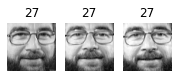

Cluster 16


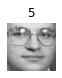

Cluster 17


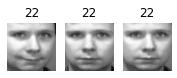

Cluster 18


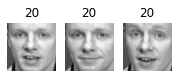

Cluster 19


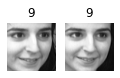

Cluster 20


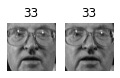

Cluster 21


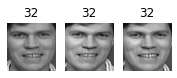

Cluster 22


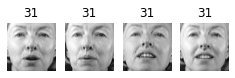

Cluster 23


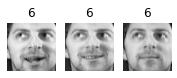

Cluster 24


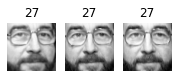

Cluster 25


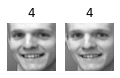

Cluster 26


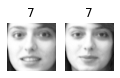

Cluster 27


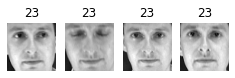

Cluster 28


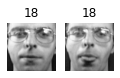

Cluster 29


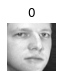

Cluster 30


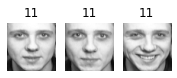

Cluster 31


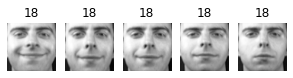

Cluster 32


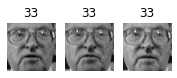

Cluster 33


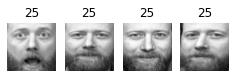

Cluster 34


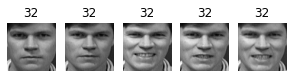

Cluster 35


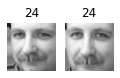

Cluster 36


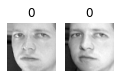

Cluster 37


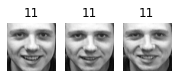

Cluster 38


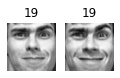

Cluster 39


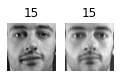

Cluster 40


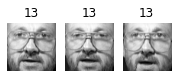

Cluster 41


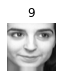

Cluster 42


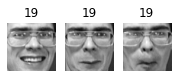

Cluster 43


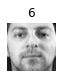

Cluster 44


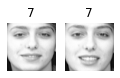

Cluster 45


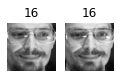

Cluster 46


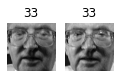

Cluster 47


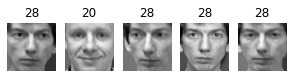

Cluster 48


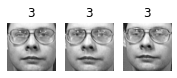

Cluster 49


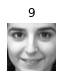

Cluster 50


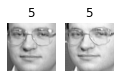

Cluster 51


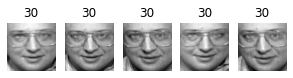

Cluster 52


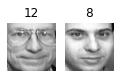

Cluster 53


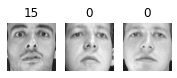

Cluster 54


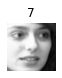

Cluster 55


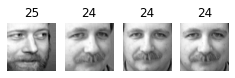

Cluster 56


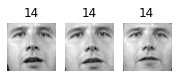

Cluster 57


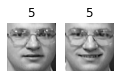

Cluster 58


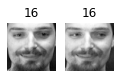

Cluster 59


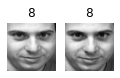

Cluster 60


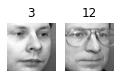

Cluster 61


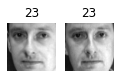

Cluster 62


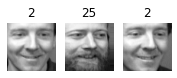

Cluster 63


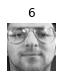

Cluster 64


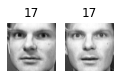

Cluster 65


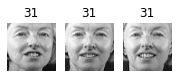

Cluster 66


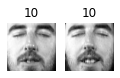

Cluster 67


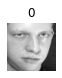

Cluster 68


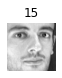

Cluster 69


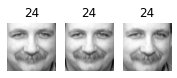

Cluster 70


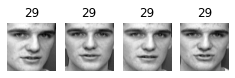

Cluster 71


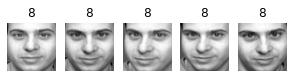

Cluster 72


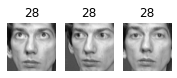

Cluster 73


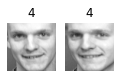

Cluster 74


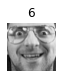

Cluster 75


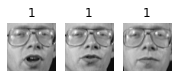

Cluster 76


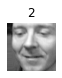

Cluster 77


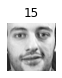

Cluster 78


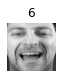

Cluster 79


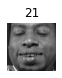

Cluster 80


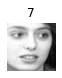

Cluster 81


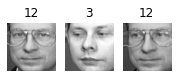

Cluster 82


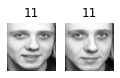

Cluster 83


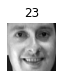

Cluster 84


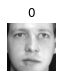

Cluster 85


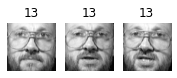

Cluster 86


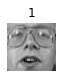

Cluster 87


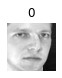

Cluster 88


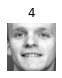

Cluster 89


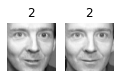

Cluster 90


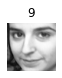

Cluster 91


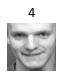

Cluster 92


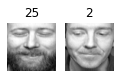

Cluster 93


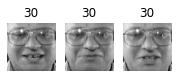

Cluster 94


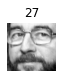

Cluster 95


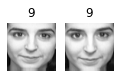

Cluster 96


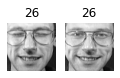

Cluster 97


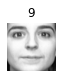

Cluster 98


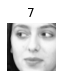

Cluster 99


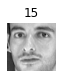

Cluster 100


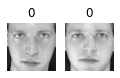

Cluster 101


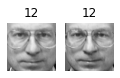

Cluster 102


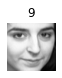

Cluster 103


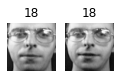

Cluster 104


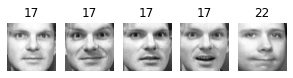

Cluster 105


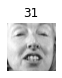

Cluster 106


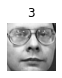

Cluster 107


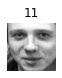

Cluster 108


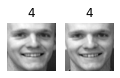

Cluster 109


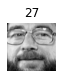

Cluster 110


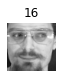

Cluster 111


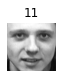

Cluster 112


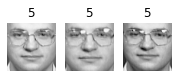

Cluster 113


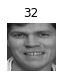

Cluster 114


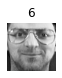

In [7]:
best_model = kmeans_per_k[np.argmax(silhouette_scores_per_k)]

def plot_faces(faces, labels, ncols = 5):
    faces = faces.reshape(-1, 64, 64)
    nrows = (len(faces) - 1) // ncols + 1
    plt.figure(figsize = (ncols, nrows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(nrows, ncols, index + 1)
        plt.imshow(face, cmap = "gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
    
for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Now this is sick.

---

# 11.

Train a classifier to predicted which person is represented in each picture & evaluate it in the validation set.

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_reduced, y_train)
rf_classifier.score(X_val_reduced, y_val)

0.9

Use K-means as a dimensionality reduction tool & train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach?

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

for k in range(5, 175, 5):
    pipe = Pipeline([("kmeans", KMeans(n_clusters = k)),
                     ("randomforest", rf_classifier)])
    pipe.fit(X_train_reduced, y_train)
    print("Clusters:", k, "; Score:", pipe.score(X_val_reduced, y_val))

Clusters: 5 ; Score: 0.45
Clusters: 10 ; Score: 0.5166666666666667
Clusters: 15 ; Score: 0.65
Clusters: 20 ; Score: 0.6666666666666666
Clusters: 25 ; Score: 0.7666666666666667
Clusters: 30 ; Score: 0.7166666666666667
Clusters: 35 ; Score: 0.8166666666666667
Clusters: 40 ; Score: 0.8
Clusters: 45 ; Score: 0.8166666666666667
Clusters: 50 ; Score: 0.8166666666666667
Clusters: 55 ; Score: 0.85
Clusters: 60 ; Score: 0.9
Clusters: 65 ; Score: 0.85
Clusters: 70 ; Score: 0.8833333333333333
Clusters: 75 ; Score: 0.9333333333333333
Clusters: 80 ; Score: 0.8333333333333334
Clusters: 85 ; Score: 0.8666666666666667
Clusters: 90 ; Score: 0.85
Clusters: 95 ; Score: 0.8833333333333333
Clusters: 100 ; Score: 0.9
Clusters: 105 ; Score: 0.8666666666666667
Clusters: 110 ; Score: 0.85
Clusters: 115 ; Score: 0.9
Clusters: 120 ; Score: 0.8833333333333333
Clusters: 125 ; Score: 0.9
Clusters: 130 ; Score: 0.85
Clusters: 135 ; Score: 0.85
Clusters: 140 ; Score: 0.8833333333333333
Clusters: 145 ; Score: 0.916666

The highest performance we reached was 0.933, which was when $k$ = 75.

What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

In [12]:
X_train_more_reduced = best_model.transform(X_train_reduced)
X_val_more_reduced = best_model.transform(X_val_reduced)
X_test_more_reduced = best_model.transform(X_test_reduced)

X_train_appended = np.c_[X_train_reduced, X_train_more_reduced]
X_val_appended = np.c_[X_val_reduced, X_val_more_reduced]
X_test_appended = np.c_[X_test_reduced, X_test_more_reduced]

for k in range(5, 175, 5):
    rf_classifier.fit(X_train_appended, y_train)
    print("Clusters:", k, "; Score:", rf_classifier.score(X_val_appended, y_val))

Clusters: 5 ; Score: 0.8833333333333333
Clusters: 10 ; Score: 0.9
Clusters: 15 ; Score: 0.8833333333333333
Clusters: 20 ; Score: 0.8833333333333333
Clusters: 25 ; Score: 0.9
Clusters: 30 ; Score: 0.8833333333333333
Clusters: 35 ; Score: 0.8833333333333333
Clusters: 40 ; Score: 0.9
Clusters: 45 ; Score: 0.9
Clusters: 50 ; Score: 0.9166666666666666
Clusters: 55 ; Score: 0.8666666666666667
Clusters: 60 ; Score: 0.85
Clusters: 65 ; Score: 0.9
Clusters: 70 ; Score: 0.9
Clusters: 75 ; Score: 0.9166666666666666
Clusters: 80 ; Score: 0.8833333333333333
Clusters: 85 ; Score: 0.8833333333333333
Clusters: 90 ; Score: 0.9
Clusters: 95 ; Score: 0.8666666666666667
Clusters: 100 ; Score: 0.8833333333333333
Clusters: 105 ; Score: 0.8833333333333333
Clusters: 110 ; Score: 0.9166666666666666
Clusters: 115 ; Score: 0.9166666666666666
Clusters: 120 ; Score: 0.9
Clusters: 125 ; Score: 0.9
Clusters: 130 ; Score: 0.9
Clusters: 135 ; Score: 0.8833333333333333
Clusters: 140 ; Score: 0.9333333333333333
Clusters

---

# 12.

In [2]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

olivetti_faces = fetch_olivetti_faces()
X = olivetti_faces.data
y = olivetti_faces.target

sss = StratifiedShuffleSplit(n_splits = 1, test_size = 60, random_state = 32)
for train_index, test_index in sss.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
for train_index, val_index in sss.split(X_train, y_train):
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
X_train.shape

(280, 4096)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.99)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(280, 199)

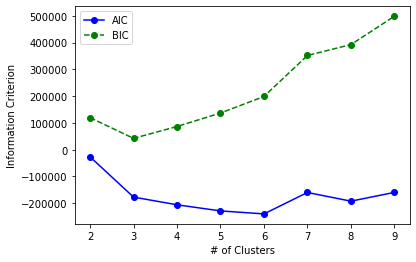

In [13]:
from sklearn.mixture import GaussianMixture
%matplotlib inline
import matplotlib.pyplot as plt

aic_per_component = []
bic_per_component = []
for component in range(2, 10):
    gmm = GaussianMixture(n_components = component)
    y_pred = gmm.fit_predict(X_train_pca)
    aic_per_component.append(gmm.aic(X_train_pca))
    bic_per_component.append(gmm.bic(X_train_pca))
    
plt.plot(range(2, 10), aic_per_component, "bo-", label = "AIC")
plt.plot(range(2, 10), bic_per_component, "go--", label = "BIC")
plt.xlabel("# of Clusters")
plt.ylabel("Information Criterion")
plt.legend(loc = "upper left")
plt.show()

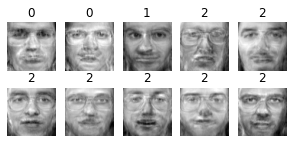

In [15]:
best_gmm = GaussianMixture(n_components = 3)
y_pred = best_gmm.fit_predict(X_train_pca)
X_faces_reduced, y_faces = best_gmm.sample(n_samples = 10)
X_faces = pca.inverse_transform(X_faces_reduced)

def plot_faces(faces, labels, ncols = 5):
    faces = faces.reshape(-1, 64, 64)
    nrows = (len(faces) - 1) // ncols + 1
    plt.figure(figsize = (ncols, nrows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(nrows, ncols, index + 1)
        plt.imshow(face, cmap = "gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
    
plot_faces(X_faces, y_faces)

Yup, the photos aren't perfectly reconstructed. Let's try some modifications.

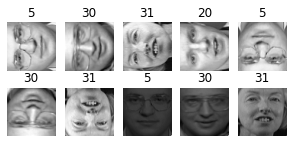

In [26]:
import numpy as np

X_rotated = np.transpose(X_train[:4].reshape(-1, 64, 64), axes = [0, 2, 1]).reshape(-1, 4096)
y_rotated = y_train[:4]
X_flipped = X_train[:3].reshape(-1, 64, 64)[:, ::-1].reshape(-1, 4096)
y_flipped = y_train[:3]
X_darkened = X_train[:3].copy()
X_darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:3]

X_modified = np.r_[X_rotated, X_flipped, X_darkened]
y_modified = np.concatenate([y_rotated, y_flipped, y_darkened])
plot_faces(X_modified, y_modified)

Here are the scores of the modified faces.

In [27]:
X_modified_pca = pca.transform(X_modified)
best_gmm.score_samples(X_modified_pca)

array([ -4548326.23324764,  -5013422.55065712,  -6523630.51024765,
        -7719469.50639071,  -5591030.78179343,  -5571062.96335964,
        -7350548.36271872,  -8979572.87416209, -11106600.58950393,
        -9061539.59514125])

Versus the scores of the normal faces.

In [29]:
best_gmm.score_samples(X_train_pca[:10])

array([615.35597398, 752.59646119, 406.93124707, 752.59606929,
       406.93236184, 615.35550502, 406.93202708, 752.59603229,
       406.93389752, 406.93467886])

---

# 13.

Here's the reconstruction error of the normal faces.

In [40]:
X_reconstructed = pca.inverse_transform(X_train_pca)
reconstructed_sqerrors = np.square(X_reconstructed - X_train)
mse = reconstructed_sqerrors.mean()
mse

0.00018431454

Here's the reconstruction error of the modified faces.

In [43]:
X_modified_reconstructed = pca.inverse_transform(X_modified_pca)
reconstructed_sqerrors = np.square(X_modified_reconstructed - X_train[:10])
mse = reconstructed_sqerrors.mean()
mse

0.07143976

Once again, here are the modified faces.

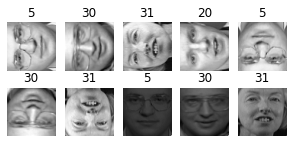

In [44]:
plot_faces(X_modified, y_modified)

Now, here are the reconstructions of the modified faces.

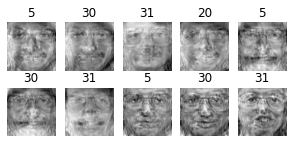

In [45]:
X_modified_reconstructed = pca.inverse_transform(X_modified_pca)
plot_faces(X_modified_reconstructed, y_modified)

Jesus, that is an abomination.